In [1]:
z,y,x = (201, 704, 600) #px
[201*0.2,0.097*704,600*0.097] #µm

[40.2, 68.288, 58.2]

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

# input data

In [2]:
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/_inputParameters.csv',names=['key','value'])
inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_DMSO_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_JASP_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_LY_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])

inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")
print(inputDataFolder)
print(outputDataFolder)
inputDataFolder = inputDataFolder.replace("6big","Samsung_T3b")#'/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample7_CD_LY_10ulMG__Position2_O1_bleachCorr/output/'
outputDataFolder = outputDataFolder.replace("6big","Samsung_T3b")#'/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample7_CD_LY_10ulMG__Position2_O1_bleachCorr/output/'
print(inputDataFolder)
print(outputDataFolder)

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)



/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output
5689.0


In [3]:
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,slave_uniqueFilenameString)
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,master_uniqueFilenameString)

--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0000_488nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70
--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70


/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
(201, 704, 600)


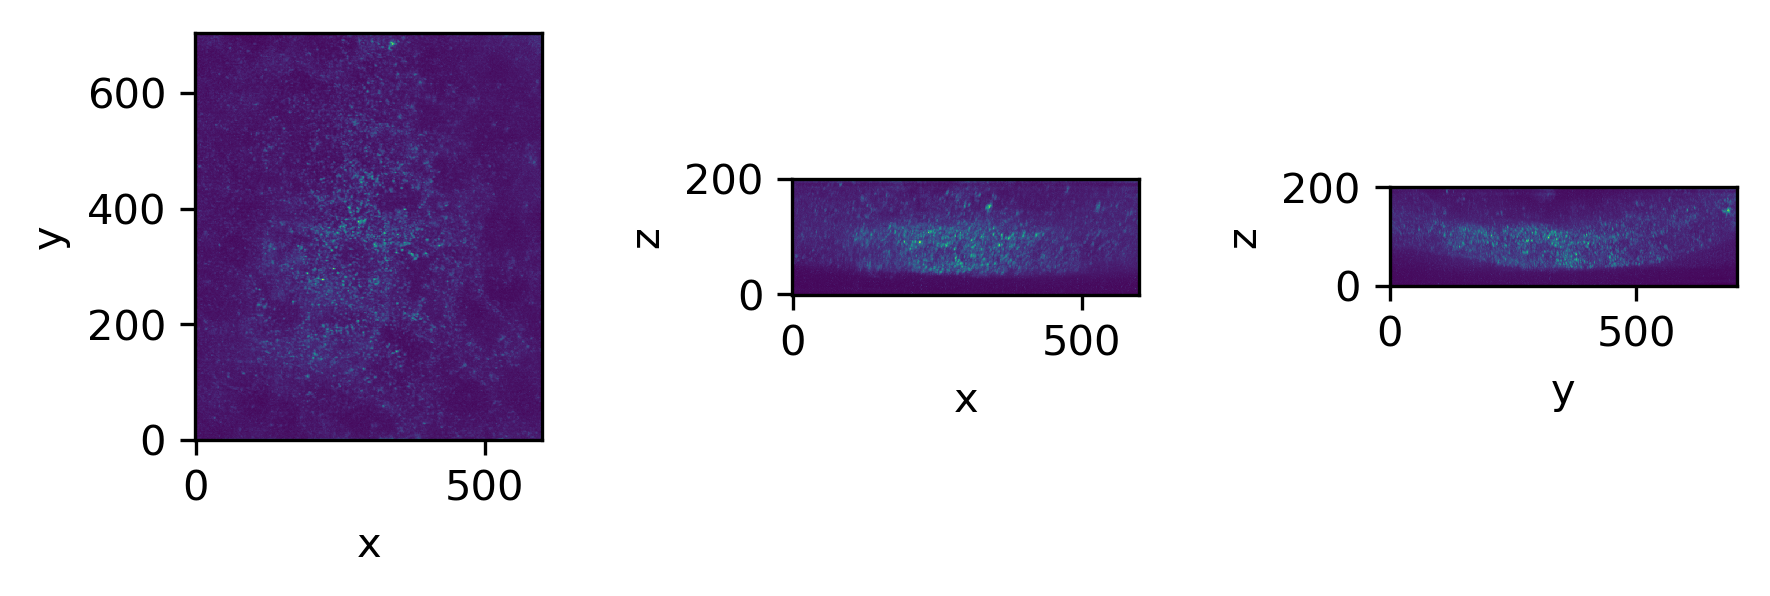

In [21]:
# read the image from where the detections come from
frameId = 0

path = inputDataFolder+'/'+master_filesOfInterest[frameId]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(path)
latticeMovieFrame_shape = latticeMovieFrame.shape
print(latticeMovieFrame_shape)

tiffproc.maxIntensityProjection(latticeMovieFrame)

In [5]:
# read the raw csv data for further processing

path = outputDataFolder+'/'+trackingCsvFilenameProcessed
print(path)
print(path)

data = pd.read_csv(path,header=0)
data.columns = ["trackId","tracklength","time[s]","frameId","lifetime","catIdx","m_x",'m_y',"m_z","m_A","m_c","m_pval_Ar","s_x",'s_y',"s_z","s_A","s_c","s_pval_Ar"]
trackIds = data.drop_duplicates(subset='trackId')['trackId'].values

data[0:5]






/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/trackedFeaturesProcessed.csv
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/trackedFeaturesProcessed.csv


,trackId,tracklength,time[s],frameId,lifetime,catIdx,m_x,m_y,m_z,m_A,m_c,m_pval_Ar,s_x,s_y,s_z,s_A,s_c,s_pval_Ar
0,1,70,0,1,398.23,4,2.470622e+02,3.589416e+02,1.549039e+02,2.852619e+04,8.000496e+03,0,2.467932e+02,3.583062e+02,1.549039e+02,2.463543e+04,2.298148e+04,4.004483e-248
1,1,70,5.689000e+00,2,398.23,4,2.456148e+02,3.597828e+02,1.550418e+02,2.568300e+04,7.529965e+03,0,2.478346e+02,3.586792e+02,1.550418e+02,3.039361e+04,2.187127e+04,9.081350e-301
2,1,70,1.137800e+01,3,398.23,4,2.461329e+02,3.596650e+02,1.552289e+02,2.243185e+04,7.161439e+03,0,2.481213e+02,3.588762e+02,1.552289e+02,2.262764e+04,2.301794e+04,2.082318e-241
3,1,70,1.706700e+01,4,398.23,4,2.464530e+02,3.601393e+02,1.541899e+02,2.305632e+04,7.131548e+03,0,2.480255e+02,3.576223e+02,1.541899e+02,1.986063e+04,2.412181e+04,6.424817e-223
4,1,70,2.275600e+01,5,398.23,4,2.450720e+02,3.601834e+02,1.542996e+02,2.097679e+04,6.756136e+03,0,2.437382e+02,3.597427e+02,1.542996e+02,1.916658e+04,2.210576e+04,2.288247e-261


# select subset

In [6]:
# select a subset of the tracks, e.g. for displaying only long tracks

#%----------------------------------------------------------------------------
#    % I. Assign category to each track
#    %----------------------------------------------------------------------------
#    % Categories:
#    % Ia)  Single tracks with valid gaps
#    % Ib)  Single tracks with invalid gaps
#    % Ic)  Single tracks cut at beginning or end
#    % Id)  Single tracks, persistent
#    % IIa) Compound tracks with valid gaps
#    % IIb) Compound tracks with invalid gaps
#    % IIc) Compound tracks cut at beginning or end
#    % IId) Compound tracks, persistent
#    
#    % The categories correspond to index 1-8, in the above order

allTrackIdsLrgrThanFour = (data[data['tracklength'] >= 4]).drop_duplicates(subset='trackId')['trackId'].values
allTrackIds = np.unique(data['trackId'].values)
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ia_Tracks_long = np.unique(data[((data['catIdx'] == 1) & (data['tracklength'] > 4))]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Ic_Tracks_long = np.unique(data[((data['catIdx'] == 3) & (data['tracklength'] > 4))]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])


print('len(allTrackIdsLrgrThanFour)/len(allTrackIds)')
print(str(len(allTrackIdsLrgrThanFour))+'/'+str(len(allTrackIds)))
print()
print(allTrackIdsLrgrThanFour)
print('/')
print(allTrackIds)
print()

len(allTrackIdsLrgrThanFour)/len(allTrackIds)
1471/3274

[   1    2    3 ..., 1469 1470 1471]
/
[   1    2    3 ..., 3272 3273 3274]



# write .bild file directly from the csv file

In [7]:
#plot them all
import math


def writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor='white'):

    
    file = open(path,'w') 
    
    file.write(".transparency 0.5\n")
    file.write(".color "+drawColor+"\n")
    
    nanLineCounter = 0
    lineCounter = 0
    trackCounter = 0
    for trackID in trackIdListToPlot:
        trackCounter = trackCounter +1
        line = ".comment trackID"+str(trackID)+"\n"
        file.write(line)
        
        
        track = data[data['trackId'] == trackID]
        tracklength = track['tracklength'].iloc[0]
        
        for i in range(1,tracklength):
            tzero = track.iloc[i-1]
            tone = track.iloc[i]
            
    
            # Data for a three-dimensional line
            x0 = float(tzero['m_x'])
            y0 = float(tzero['m_y'])
            z0 = np.abs(float(tzero['m_z']) - latticeMovieFrame_shape[2])
            A0 = float(tzero['m_A'])
            
            x1 = float(tone['m_x'])
            y1 = float(tone['m_y'])
            z1 = np.abs(float(tone['m_z'])- latticeMovieFrame_shape[2])
            A1 = float(tone['m_A'])
            
            if(math.isnan(x0) or math.isnan(y0) or math.isnan(z0) or math.isnan(x1) or math.isnan(y1) or math.isnan(z1)):
                line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
                # print(line)
                nanLineCounter = nanLineCounter +1
                continue
            
            
            #.arrow x1 y1 z1 x2 y2 z2 [r1 [r2 [rho]]] 
            
            line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
            lineCounter = lineCounter + 1
            file.write(line)
            
    print('# tracks: '+str(trackCounter))
    print('# lines written: '+str(lineCounter))
    print('# nan lines encountered and discarded: '+str(nanLineCounter))
    print(path)
    file.close()

In [8]:
# plot all tracks

trackData = data
trackIdListToPlot = np.unique(data['trackId'].values)
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/'+master_trackingProcessedBildFilename
drawColor = 'white'

writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)


# tracks: 3274
# lines written: 13810
# nan lines encountered and discarded: 86
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/tracksProcessed.bild


# write individual .bild files, through the track class

In [7]:
#decide for the color map
#https://matplotlib.org/examples/color/colormaps_reference.html
import matplotlib
cmap = matplotlib.cm.get_cmap('jet')
rgba = cmap(0.5)
print(rgba)

(0.49019607843137247, 1.0, 0.47754585705249841, 1.0)


In [8]:
# create Track objects for every track

import timeit


trackIdListInvestigated = cat_Ia_Tracks_long

start_time = timeit.default_timer()

tracks = []
cm0 = []
len0 = []
Amean0 = []
maxDist0 = []



for i in range(0,len(trackIdListInvestigated)):
    if(i %1000 == 0):
        print(str(i)+"/"+str(len(trackIdListInvestigated)))
    trackData = data[data['trackId'] == trackIdListInvestigated[i]]
    #a = Track.Track(trackData,latticeMovieFrame_shape)
    a = Track.Track(trackData)
    tracks.append(a)
    cm0.append(a.m_cm)
    len0.append(a.len)
    Amean0.append(a.m_Amean)
    maxDist0.append(a.m_maxDist)
    
elapsed = timeit.default_timer() - start_time
print('time elapse: '+str(np.round(elapsed,decimals=2))+'s')

0/621
time elapse: 1.2s


In [31]:
# go through all the Tracks in the list and write a bild file
latticeMovieFrame_shape = (201, 704, 600)
print(latticeMovieFrame_shape)
#latticeMovieFrame_shape = (0,0,0)

maxLength = 40.
for track in tracks:
    numberOfZeros = int(np.ceil(np.log10(movieLength+1)))
    output_filename = 'track_'+str(track.id).zfill(numberOfZeros)+'.bild'
    path = outputDataFolder+'/'+output_filename
    rgbcolor = np.around(cmap(float(track.len)/maxLength)[0:3],decimals=2)
    print(rgbcolor)
    print(path)
    
#    track.writeBILD(path,latticeMovieFrame_shape,color='orange')


    track.writeBILD(path,latticeMovieFrame_shape,color=rgbcolor,radius=0.25,center=[0,0,-300])

(201, 704, 600)
[ 1.    0.22  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_31.bild
[ 1.    0.41  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_34.bild
[ 1.    0.58  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_39.bild
[ 1.    0.58  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_40.bild
[ 0.97  0.96  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_49.bild
[ 0.97  0.96  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_50.bild
[ 0.97  0.96  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_51.bild
[ 0.97  0.96  0.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_52.bild
[ 0.81  1.    0.16]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_61.bild
[ 0.81  1.    0.16]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_62.bild
[ 0.73  1.    

[ 0.    0.69  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_269.bild
[ 0.    0.69  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_270.bild
[ 0.    0.69  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_271.bild
[ 0.   0.6  1. ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_290.bild
[ 0.   0.6  1. ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_291.bild
[ 0.   0.6  1. ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_292.bild
[ 0.   0.6  1. ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_293.bild
[ 0.   0.6  1. ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_294.bild
[ 0.   0.6  1. ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_295.bild
[ 0.   0.6  1. ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_296.bild
[ 0.   0.6  1. ]
/Users/johannesschoenebe

[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_632.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_633.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_634.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_635.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_636.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_637.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_638.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_639.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_641.bild
[ 0.    0.19  1.  ]
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/track_642.bild
[ 0.    0.19  1.  ]


In [1]:
#plot them all

#%----------------------------------------------------------------------------
#    % I. Assign category to each track
#    %----------------------------------------------------------------------------
#    % Categories:
#    % Ia)  Single tracks with valid gaps
#    % Ib)  Single tracks with invalid gaps
#    % Ic)  Single tracks cut at beginning or end
#    % Id)  Single tracks, persistent
#    % IIa) Compound tracks with valid gaps
#    % IIb) Compound tracks with invalid gaps
#    % IIc) Compound tracks cut at beginning or end
#    % IId) Compound tracks, persistent
#    
#    % The categories correspond to index 1-8, in the above order



#data = longtracks
data = data

allTracks = np.unique(data['trackId'].values)
print('# all tracks '+ str(len(allTracks)))
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])



trackData = data
trackIdListToPlot = cat_Ia_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_Ia_Tracks.bild'
drawColor = 'green'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

trackData = data
trackIdListToPlot = cat_Ib_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_Ib_Tracks.bild'
drawColor = 'yellow'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

trackData = data
trackIdListToPlot = cat_Ic_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_Ic_Tracks.bild'
drawColor = 'sienna'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

trackData = data
trackIdListToPlot = cat_Id_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_Id_Tracks.bild'
drawColor = 'red'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

#-------

trackData = data
trackIdListToPlot = cat_IIa_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_IIa_Tracks.bild'
drawColor = 'cyan'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

trackData = data
trackIdListToPlot = cat_IIb_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_IIb_Tracks.bild'
drawColor = 'blue'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

trackData = data
trackIdListToPlot = cat_IIc_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_IIc_Tracks.bild'
drawColor = 'purple'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

trackData = data
trackIdListToPlot = cat_IId_Tracks
latticeMovieFrame_shape = latticeMovieFrame_shape
path = outputDataFolder+'/cat_IId_Tracks.bild'
drawColor = 'grey'
writeAllTracksProcessed_bildFile(trackData,trackIdListToPlot,latticeMovieFrame_shape,path,drawColor)

NameError: name 'data' is not defined